<a href="https://www.kaggle.com/adhang/iris-flower-classification-knn-100-accuracy?scriptVersionId=90287256" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Iris Flower Classification
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)

___

**Introduction**<br>
- I got this dataset from UCI Machine Learning. This dataset contains information about iris flowers: Iris Setosa, Iris Versicolor, and Iris Virginica
- In this dataset, iris flowers are classified by petal and sepal size (length & width)
<br><br>

**Attribute Descriptions**<br>
This dataset contains 6 columns:
- `Id` - to identify each record
- Continuous data
    - `SepalLengthCm` - iris sepal length in centimeter
    - `SepalWidthCm` - iris sepal width in centimeter
    - `PetalLengthCm` - iris petal length in centimeter
    - `PetalWidthCm` - iris petal width in centimeter
- Categorical data
    - `Species` - iris species name
<br><br>

**Objectives**
- Build a machine learning model using K-Nearest Neighbors (KNN) to predict iris species

# 2. Importing Libraries

In [1]:
!pip install inflection

In [2]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# 3. Reading Dataset

In [3]:
data = pd.read_csv('../input/iris/Iris.csv')

# check first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


There are 6 columns. But, we don't need the `Id` column. We can drop it. Also, I will change the column name, just for readability. It's a personal preference.

In [4]:
# renaming the column
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace('_cm', '')

data.columns = column_list
column_numerical = list(data.columns[1:-1])

data.drop('id', axis=1, inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Exploratory Data Analysis

## Dataset Overview

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe().round(3)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [7]:
# check total null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

From this data information, we can see that there are no null values in this dataset. It's a good sign.

## Target Distribution

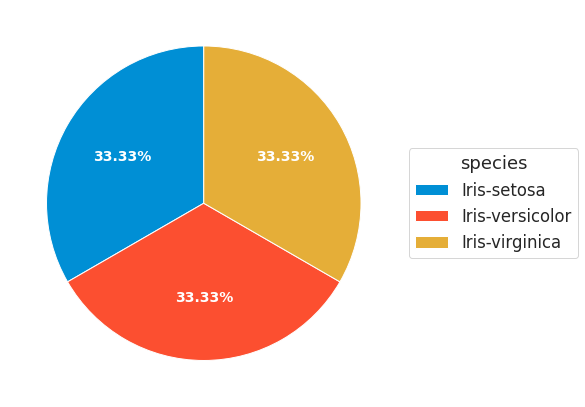

In [8]:
pie_data = data['species'].value_counts(normalize=True).values * 100
pie_label = data['species'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=90,
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='species',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

The target distribution of this dataset is balanced.

## Box Plot

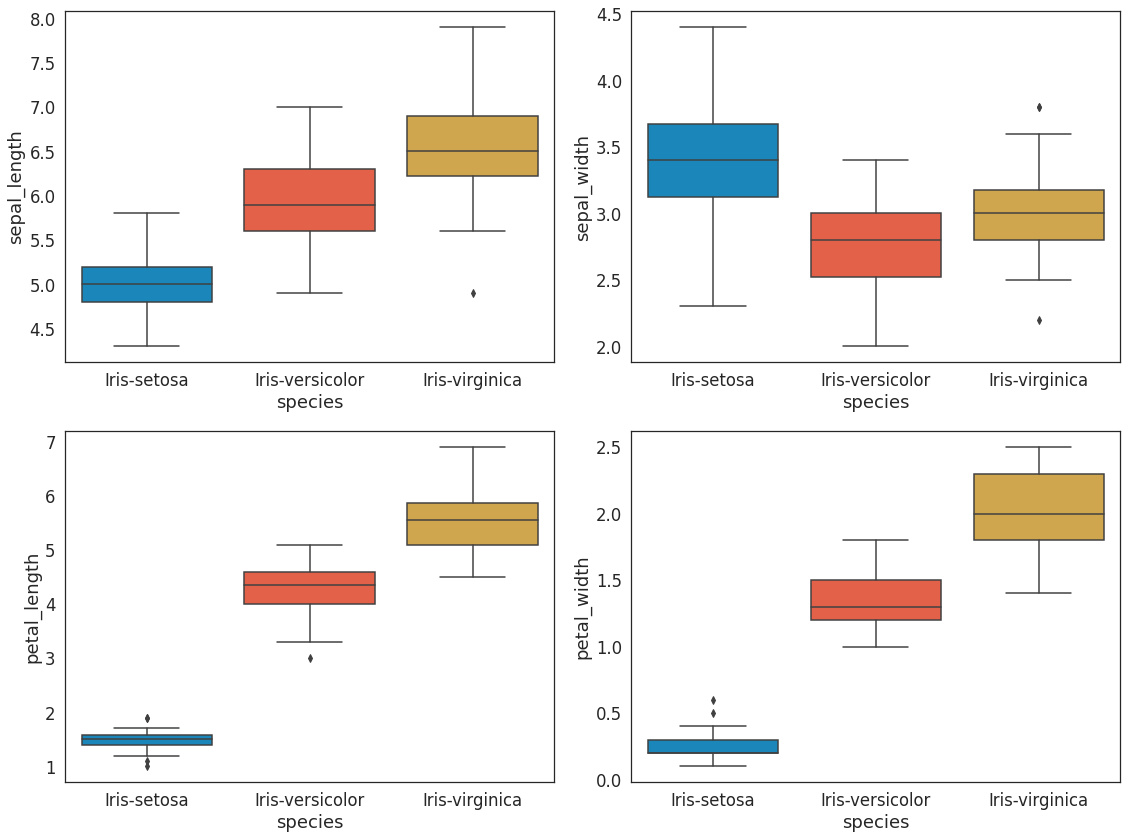

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, x='species', y=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

Some of the attributes have outliers. The measurement range is also different, I will scale it later.

## Histogram

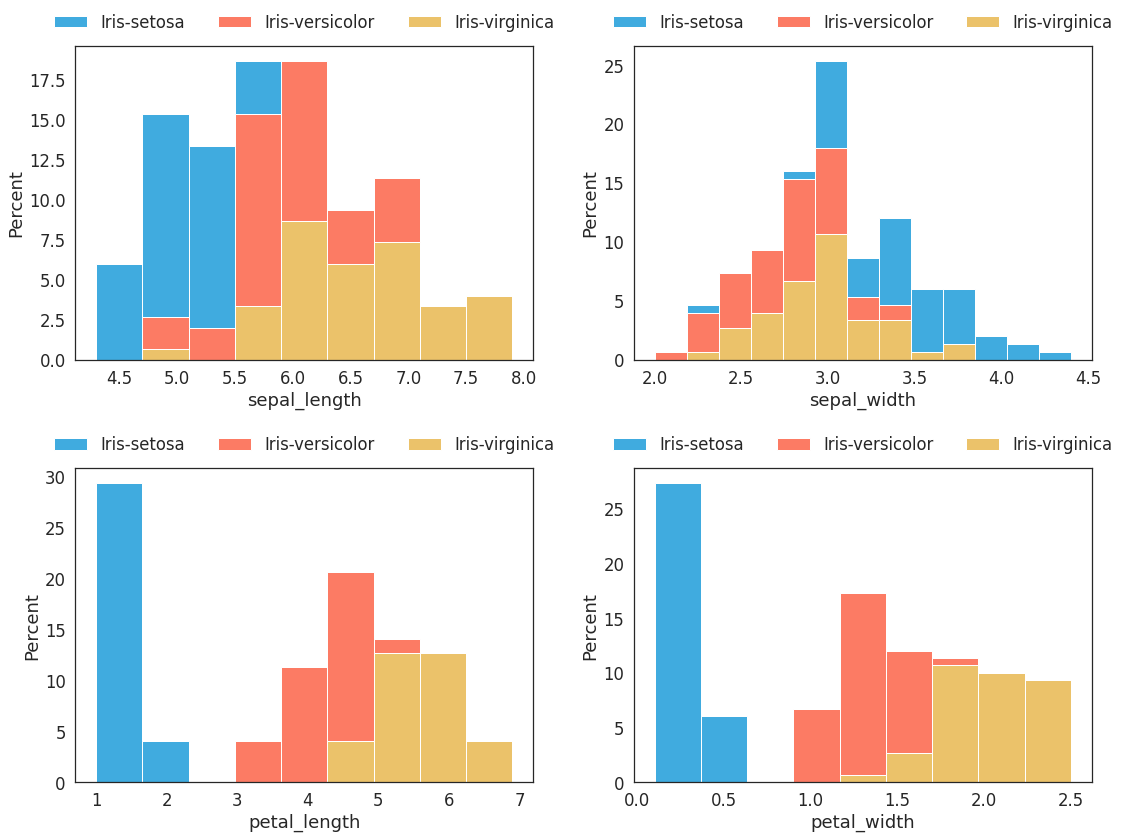

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='species', multiple='stack', stat='percent', fill=True, ax=axes_list[i])
  sns.move_legend(axes_list[i], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

plt.tight_layout()
plt.show()

In [11]:
data[column_numerical].skew().round(3)

sepal_length    0.315
sepal_width     0.334
petal_length   -0.274
petal_width    -0.105
dtype: float64

Some of attributes are skewed.

## Violin Plot

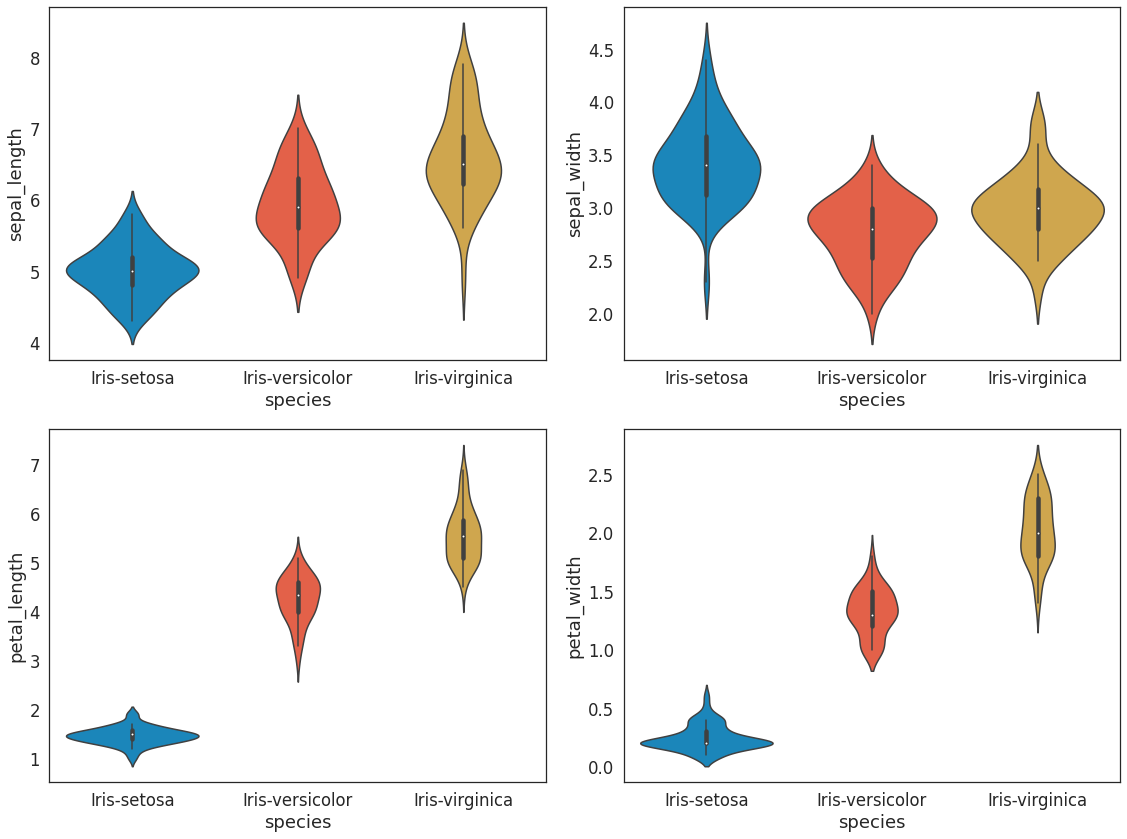

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.violinplot(data=data, x='species', y=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

## Pair Plot
I will see the attribute distribution 

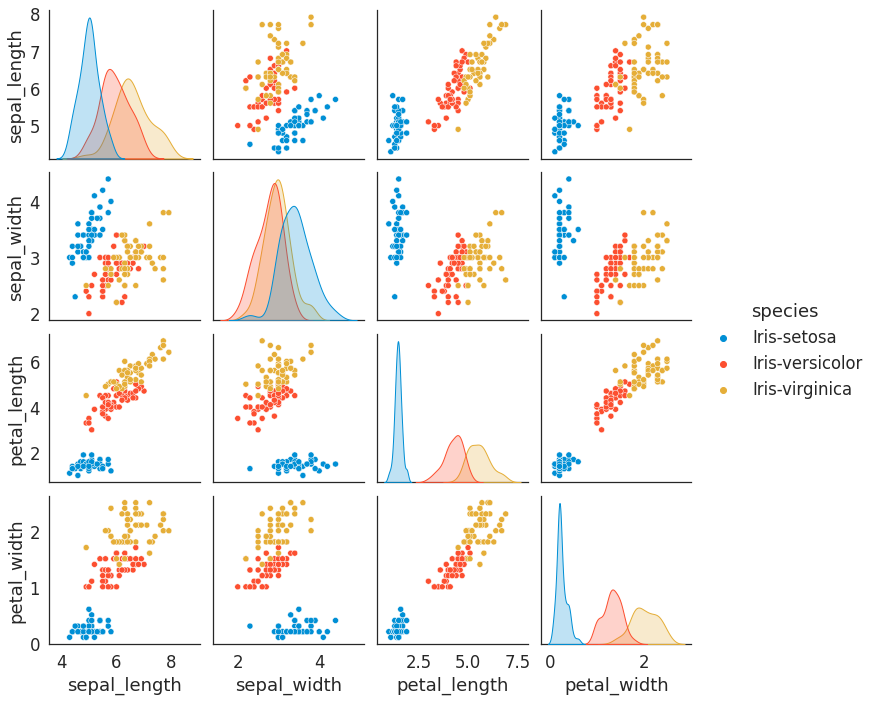

In [13]:
sns.pairplot(data, x_vars=column_numerical, y_vars=column_numerical, hue='species')

## Heatmap Correlation

In [14]:
corr_matrix = data[column_numerical].corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109000,0.872000,0.818000
sepal_width,-0.109000,1.000000,-0.421000,-0.357000
petal_length,0.872000,-0.421000,1.000000,0.963000
petal_width,0.818000,-0.357000,0.963000,1.000000


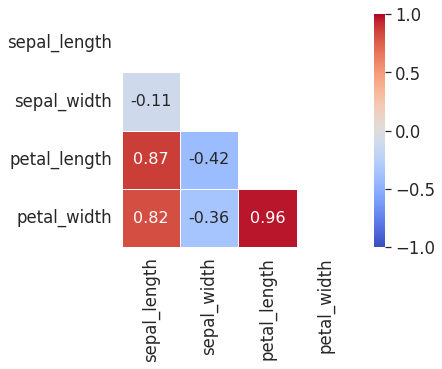

In [15]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16})

plt.show()

# 5. Data Preprocessing

## Train - Test Split

In [16]:
data_X = data.drop('species', axis=1)
data_y = data['species']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

## Label Encoding

In [17]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

## Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [18]:
with pd.option_context('mode.chained_assignment', None):
    for i in column_numerical:
      scaler = MinMaxScaler()
      scaler.fit(X_train[[i]])

      X_train[[i]] = scaler.transform(X_train[[i]])
      X_test[[i]] = scaler.transform(X_test[[i]])

## Pair Plot

In [19]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)
data_scale = data_scale.join(pd.Series(y_train, name='species', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')
data_scale = data_scale.join(pd.Series(y_test, name='species', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

data_scale['species_1'].fillna(data_scale['species_2'], inplace=True)
data_scale.drop(columns='species_2', inplace=True)
data_scale.rename(columns={'species_1':'species'}, inplace=True)

# renaming the column, for better viz
data_scale_col = list(data_scale.columns)

for i, col in enumerate(data_scale_col):
  data_scale_col[i] = inflection.underscore(data_scale_col[i])

data_scale.columns = data_scale_col

data_scale.head()

,sepal_length,sepal_width,petal_length,petal_width,species
33,0.333333,1.000000,0.067797,0.041667,Iris-setosa
20,0.305556,0.636364,0.118644,0.041667,Iris-setosa
115,0.583333,0.545455,0.728814,0.916667,Iris-virginica
124,0.666667,0.590909,0.796610,0.833333,Iris-virginica
35,0.194444,0.545455,0.033898,0.041667,Iris-setosa


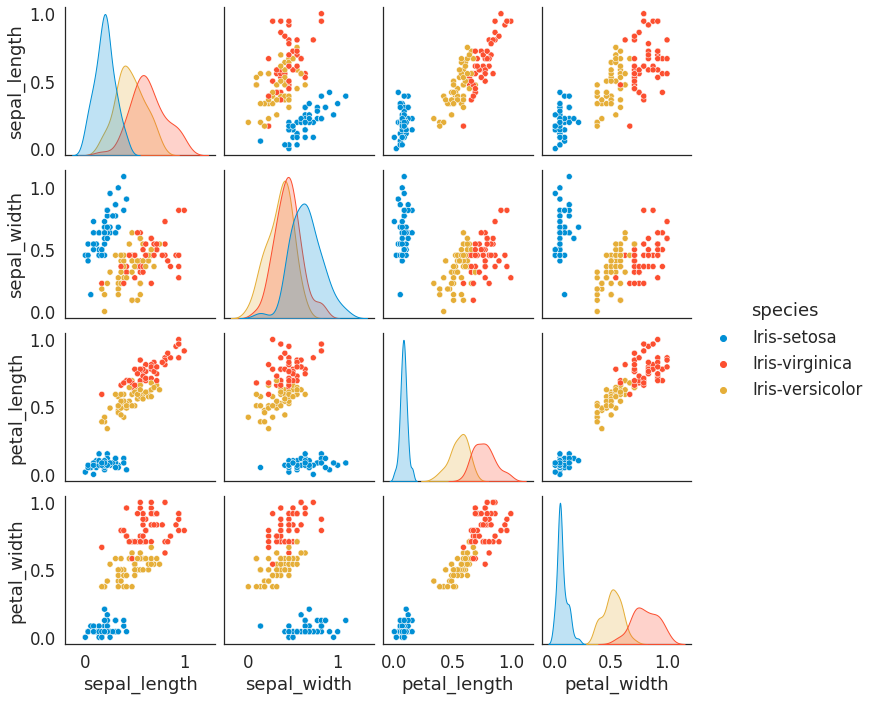

In [20]:
sns.pairplot(data_scale, x_vars=column_numerical, y_vars=column_numerical, hue='species')

## Heatmap Correlation

In [21]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

data_update = pd.concat([X_train_scale, X_test_scale], axis=0)
data_update = data_update.join(pd.Series(y_train_encode, name='species', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')
data_update = data_update.join(pd.Series(y_test_encode, name='species', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

data_update['species_1'].fillna(data_update['species_2'], inplace=True)
data_update.drop(columns='species_2', inplace=True)
data_update.rename(columns={'species_1':'species'}, inplace=True)

# renaming the column, for better viz
data_update_col = list(data_update.columns)

for i, col in enumerate(data_update_col):
  data_update_col[i] = inflection.underscore(data_update_col[i])

data_update.columns = data_update_col

data_update.head()

,sepal_length,sepal_width,petal_length,petal_width,species
33,0.333333,1.000000,0.067797,0.041667,0.0
20,0.305556,0.636364,0.118644,0.041667,0.0
115,0.583333,0.545455,0.728814,0.916667,2.0
124,0.666667,0.590909,0.796610,0.833333,2.0
35,0.194444,0.545455,0.033898,0.041667,0.0


In [22]:
corr_matrix = data_update.corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109000,0.872000,0.818000,0.783000
sepal_width,-0.109000,1.000000,-0.421000,-0.357000,-0.419000
petal_length,0.872000,-0.421000,1.000000,0.963000,0.949000
petal_width,0.818000,-0.357000,0.963000,1.000000,0.956000
species,0.783000,-0.419000,0.949000,0.956000,1.000000


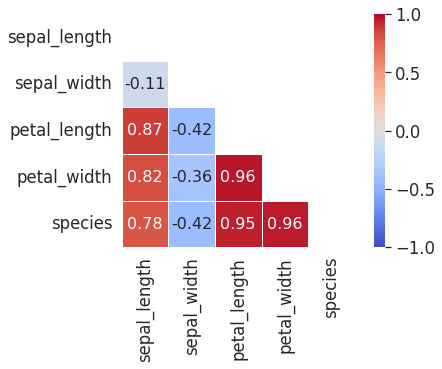

In [23]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16})

plt.show()

# 6. K-Nearest Neighbors

## Building Model

In [24]:
model = KNeighborsClassifier()
model.fit(X_train, y_train_encode)

KNeighborsClassifier()

## Predicting

In [25]:
y_pred = model.predict(X_test)

## Model Evaluation

### Classification Report

In [26]:
print(classification_report(y_test_encode, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.938     1.000     0.968        15
           2      1.000     0.933     0.966        15

    accuracy                          0.978        45
   macro avg      0.979     0.978     0.978        45
weighted avg      0.979     0.978     0.978        45



In [27]:
print('Accuracy\t: ', round(accuracy_score(y_test_encode, y_pred),3))
print('Precision\t: ', round(precision_score(y_test_encode, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test_encode, y_pred, average='macro'),3))

Accuracy	:  0.978
Precision	:  0.979
Recall		:  0.978


### Confusion Matrix

In [28]:
species_name = dict(zip([0,1,2], le.classes_))
species_name

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [29]:
cm = confusion_matrix(y_test_encode, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns=species_name, index=species_name, inplace=True)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,15,0,0
Iris-versicolor,0,15,0
Iris-virginica,0,1,14


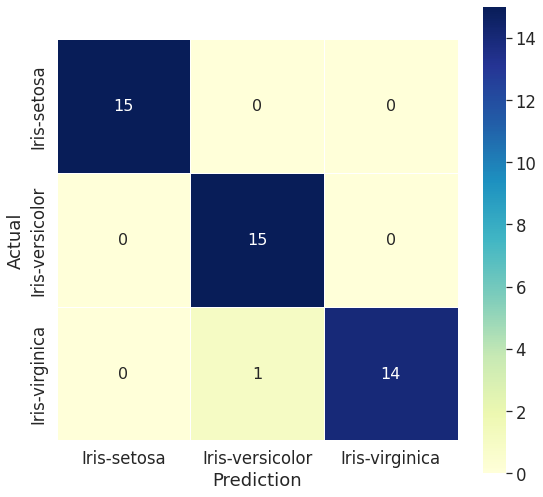

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

# 7. Grid Search
Grid search is one method for tuning hyperparameter values. For KNN, we want to find the best number of neighbors. Would using grid search give better results? Let's see.

## Best Parameter

In [31]:
data_X_update = data_update.drop('species', axis=1)
data_y_update = data_update['species']

X_train, X_test, y_train, y_test = train_test_split(data_X_update, data_y_update,
                                                    test_size=0.3, random_state=1, stratify=data_y_update)

knn = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors':np.arange(2,10)}

# use grid search to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(data_X_update, data_y_update)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

What is the best value for `n_neighbors` parameter? And how is the score?

In [32]:
best_n = knn_gscv.best_params_['n_neighbors']
acc = knn_gscv.best_score_

print(f'Best n_neighbors\t: {best_n}')
print(f'Accuracy\t\t: {acc.round(3)}')

Best n_neighbors	: 6
Accuracy		: 0.967


## Model with Best Parameter
Let's try to build our new KNN model using best parameter from grid search.

In [33]:
model_gs = KNeighborsClassifier(n_neighbors=best_n)
model_gs.fit(X_train, y_train_encode)

y_pred = model_gs.predict(X_test)

### Classification Report

In [34]:
print(classification_report(y_test_encode, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        15

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



In [35]:
print('Accuracy\t: ', round(accuracy_score(y_test_encode, y_pred),3))
print('Precision\t: ', round(precision_score(y_test_encode, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test_encode, y_pred, average='macro'),3))

Accuracy	:  1.0
Precision	:  1.0
Recall		:  1.0


### Confusion Matrix

In [36]:
species_name = dict(zip([0,1,2], le.classes_))
species_name

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [37]:
cm = confusion_matrix(y_test_encode, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns=species_name, index=species_name, inplace=True)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,15,0,0
Iris-versicolor,0,15,0
Iris-virginica,0,0,15


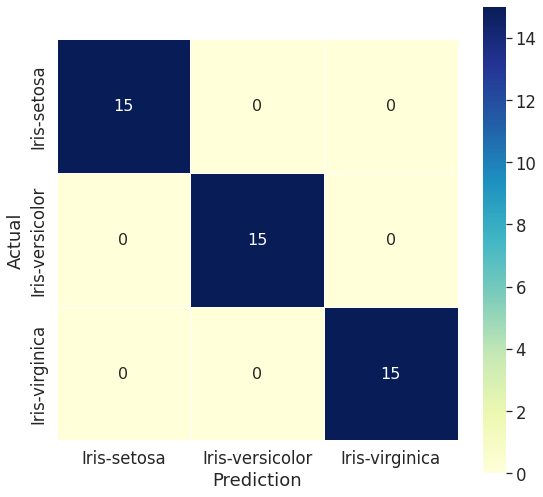

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

# 8. Conclusion
🎯 **I get 100% accuracy!** 🎯
<br><br>
Thank you for reading this notebook. You may upvote if you like this notebook. See you on the next projects! 😉